In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from publish import *

# STOCKS DATA

## -  Commodities

In [10]:
commodities_data = pd.read_csv("all_commodities.csv")

commodities_data

,Date-Time,Value,Unit,Commodity
0,2024-01-01,203.879130,Cents per Pound,Coffee
1,2023-12-01,210.310476,Cents per Pound,Coffee
2,2023-11-01,197.433182,Cents per Pound,Coffee
3,2023-10-01,183.951364,Cents per Pound,Coffee
4,2023-09-01,183.589048,Cents per Pound,Coffee
...,...,...,...,...
1222,1990-05-01,14.619999,Cents per Pound,Sugar
1223,1990-04-01,15.240002,Cents per Pound,Sugar
1224,1990-03-01,15.310001,Cents per Pound,Sugar
1225,1990-02-01,14.650002,Cents per Pound,Sugar


In [11]:
commodities = commodities_data["Commodity"].unique()

commodities

array(['Coffee', 'Corn', nan, 'Sugar'], dtype=object)

In [20]:
null_rows = []

for i, row in commodities_data.iterrows():
    if pd.isnull(row["Commodity"]):
        null_rows.append(i)

if null_rows == list(range(410, 818)):
    print("BLOCK OF COMMODITY VALUES ARE NULL")

print(f"THESE VALUES SHOULD BE: {commodities_data['Commodity'].values[null_rows[0] - 1]}")

BLOCK OF VALUES ARE NULL
THESE VALUES SHOULD BE: Corn


In [21]:
null_rows = []

for i, row in commodities_data.iterrows():
    if pd.isnull(row["Unit"]):
        null_rows.append(i)

if null_rows == list(range(410, 818)):
    print("BLOCK OF UNIT VALUES ARE NULL")

print(f"THESE VALUES SHOULD BE: {commodities_data['Unit'].values[null_rows[0] - 1]}")

BLOCK OF UNIT VALUES ARE NULL
THESE VALUES SHOULD BE: Dollar per Metric Ton


#### Block of commodity data is missing, which should be Corn and Dollar per Metric Ton

In [25]:
commodities_data = commodities_data.fillna(value={"Unit": "Dollar per Metric Ton", "Commodity": "Corn"})

commodities_data[409:818]

,Date-Time,Value,Unit,Commodity
409,2024-01-01,198.757928,Dollar per Metric Ton,Corn
410,2023-12-01,207.397969,Dollar per Metric Ton,Corn
411,2023-11-01,209.040297,Dollar per Metric Ton,Corn
412,2023-10-01,221.902519,Dollar per Metric Ton,Corn
413,2023-09-01,223.847666,Dollar per Metric Ton,Corn
...,...,...,...,...
813,1990-05-01,121.254097,Dollar per Metric Ton,Corn
814,1990-04-01,118.498337,Dollar per Metric Ton,Corn
815,1990-03-01,109.837318,Dollar per Metric Ton,Corn
816,1990-02-01,106.294167,Dollar per Metric Ton,Corn


In [31]:
commodity_dfs = {}

for commodity in commodities:
    condensed_df = commodities_data[commodities_data["Commodity"] == commodity].reset_index().drop(["index"], axis=1)
    if len(condensed_df) != 0:
        commodity_dfs[commodity] = condensed_df

#### All data from Jan 1990 to Jan 2024

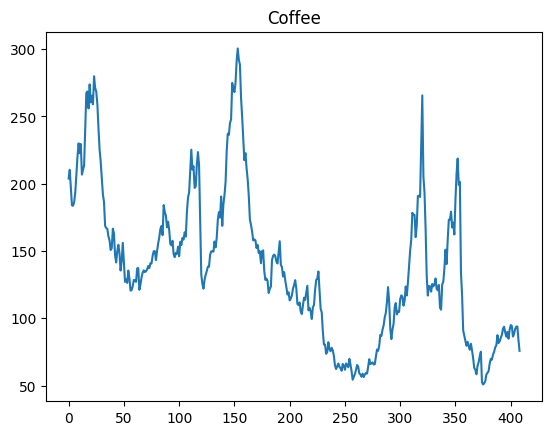

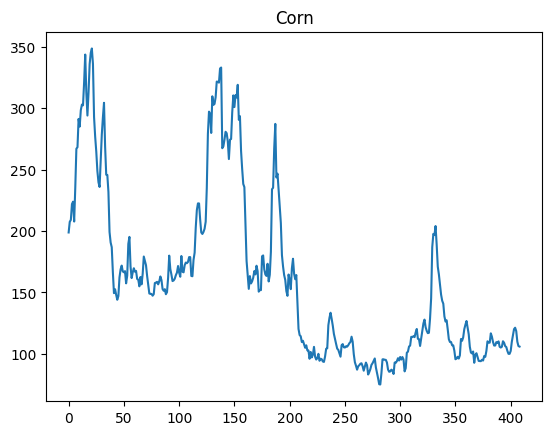

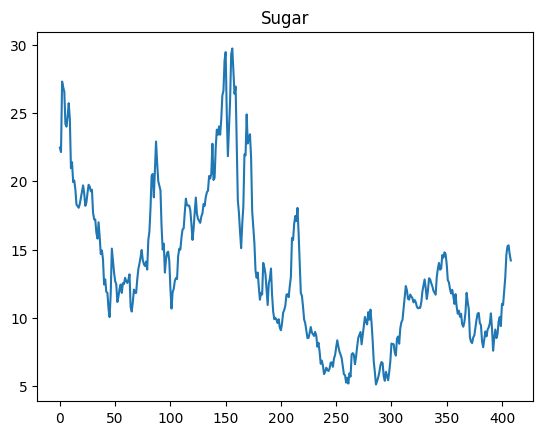

In [32]:
for commodity in commodity_dfs:
    plt.plot(range(len(commodity_dfs[commodity])), commodity_dfs[commodity]["Value"].values)
    plt.title(commodity)
    plt.show()

## -  Stocks/ETFs

### First, get their descriptions

In [47]:
stocks_desc = pd.read_csv("stock_descriptions.csv")

stocks_desc

,Symbol,AssetType,Name,Description,Sector,Industry
0,QSR,Common Stock,Restaurant Brands International Inc,"Restaurant Brands International Inc. owns, ope...",TRADE & SERVICES,RETAIL-EATING PLACES
1,ALG,Common Stock,Alamo Group Inc,"Alamo Group Inc. designs, manufactures, distri...",TECHNOLOGY,FARM MACHINERY & EQUIPMENT
2,SBUX,Common Stock,Starbucks Corporation,Starbucks Corporation is an American multinati...,TRADE & SERVICES,RETAIL-EATING & DRINKING PLACES
3,CAG,Common Stock,ConAgra Foods Inc,"Conagra Brands, Inc. (formerly ConAgra Foods) ...",MANUFACTURING,FOOD AND KINDRED PRODUCTS
4,HRL,Common Stock,Hormel Foods Corporation,Hormel Foods Corporation is an American compan...,MANUFACTURING,MEAT PACKING PLANTS
5,DPZ,Common Stock,Domino’s Pizza Inc,"Domino's Pizza, Inc., branded as Domino's, is ...",TRADE & SERVICES,WHOLESALE-GROCERIES & RELATED PRODUCTS
6,CMG,Common Stock,Chipotle Mexican Grill Inc,"Chipotle Mexican Grill, Inc., often known simp...",TRADE & SERVICES,RETAIL-EATING PLACES
7,DRI,Common Stock,Darden Restaurants Inc,"Darden Restaurants, Inc. is an American multi-...",TRADE & SERVICES,RETAIL-EATING PLACES
8,GIS,Common Stock,General Mills Inc,"General Mills, Inc., is an American multinatio...",MANUFACTURING,GRAIN MILL PRODUCTS
9,TSCO,Common Stock,Tractor Supply Company,Tractor Supply Company (TSCO) is an American r...,TRADE & SERVICES,"RETAIL-BUILDING MATERIALS, HARDWARE, GARDEN SU..."


In [35]:
stocks_data = pd.read_csv("all_stock_and_etfs.csv")

stocks_data

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
0,2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
1,2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2,2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
3,2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
4,2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL
...,...,...,...,...,...,...,...
163552,1999-11-05,9.25,9.5000,9.2500,9.50,2300,ALG
163553,1999-11-04,9.31,9.4400,9.3100,9.31,1100,ALG
163554,1999-11-03,9.00,9.2500,9.0000,9.19,35000,ALG
163555,1999-11-02,8.75,8.8800,8.6200,8.88,7700,ALG


In [37]:
tickers = stocks_data["Ticker_Symbol"].unique()

tickers

array(['HRL', 'VOO', 'ADM', 'AGCO', 'DIA', 'PEP', 'QSR', 'TSCO', 'ONEQ',
       'PPC', 'CAG', 'DRI', 'HSY', 'CAT', 'SBUX', 'CMG', 'COKE', 'CNHI',
       'SPY', 'DE', 'TSN', 'GIS', 'WEN', 'YUM', 'VMI', 'MCD', 'SAP',
       'DPZ', 'ALG'], dtype=object)

In [38]:
for x in stocks_data["Ticker_Symbol"].values:
    if pd.isnull(x):
        print(x)

In [39]:
tickers_dfs = {}

for ticker in tickers:
    tickers_dfs[ticker] = stocks_data[stocks_data["Ticker_Symbol"] == ticker].reset_index().drop(["index"], axis=1)

In [40]:
for ticker in tickers_dfs:
    print(len(tickers_dfs[ticker]))

6114
3387
6114
6114
6117
6114
2310
6114
5134
6114
6114
6114
6114
6114
6114
4547
6114
2615
6117
6114
6114
6114
6114
6114
6114
6114
6114
4936
6114


### Length of dataframes differ and are done (roughly) daily rather than monthly

In [45]:
# Creating new axis which has time (in years) since 0 AD (as some data from certain days are missing)
def dt_to_time(datetime):
    year, month, day = datetime.split("-")
    return int(year) + int(month) / 12 + int(day) / 365

for ticker in tickers_dfs:
    tickers_dfs[ticker]["Time"] = tickers_dfs[ticker]["Date-Time"].apply(dt_to_time)

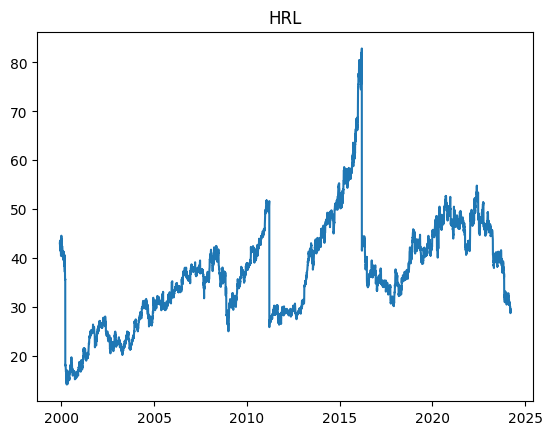

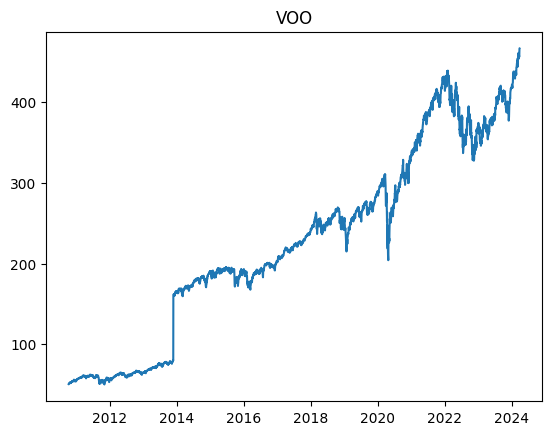

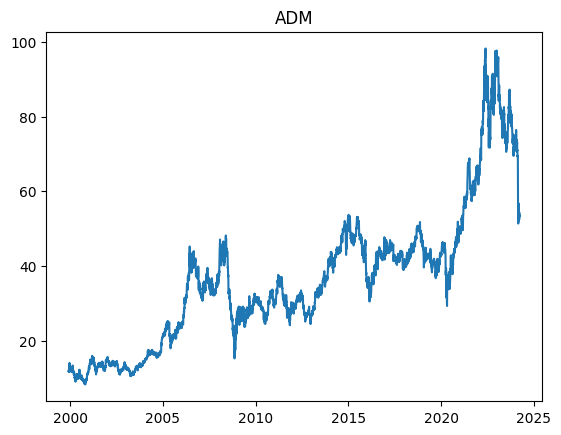

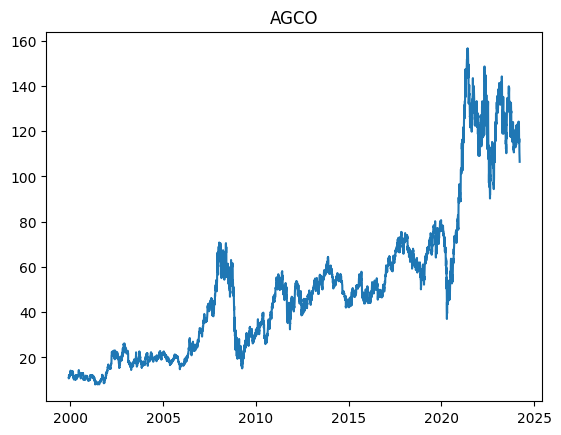

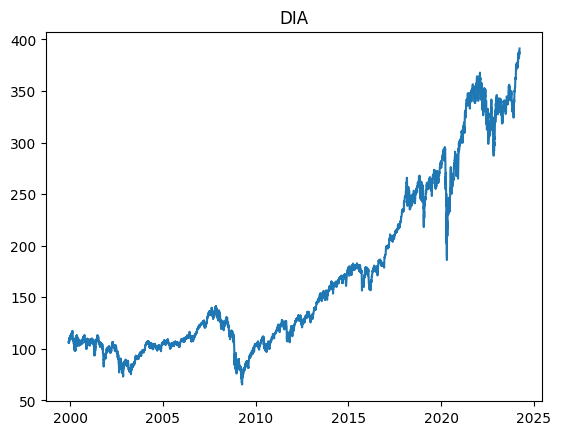

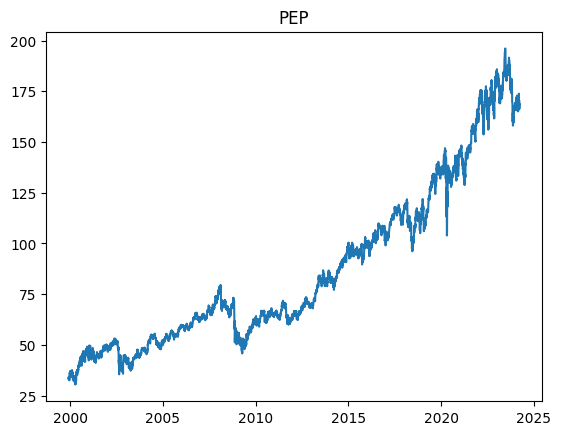

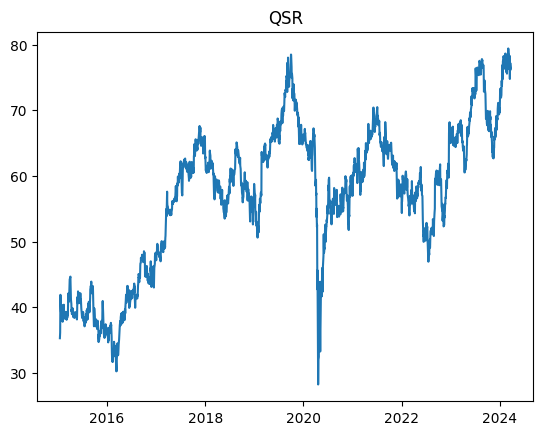

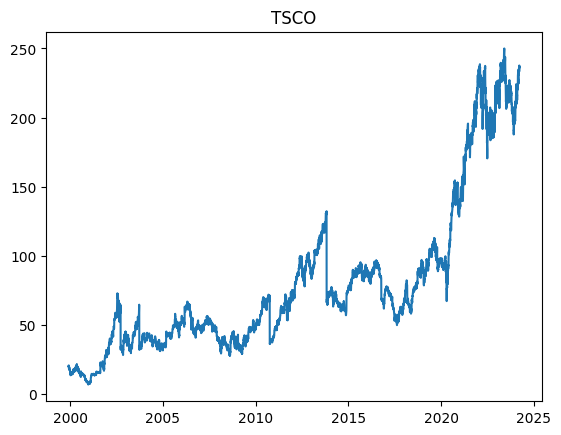

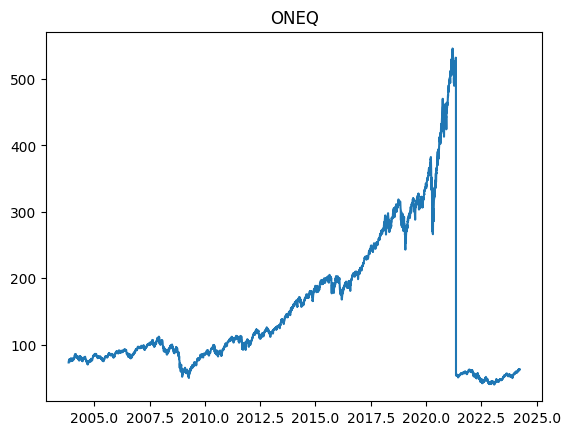

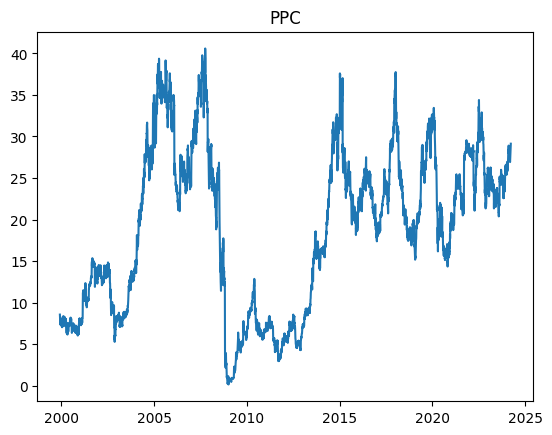

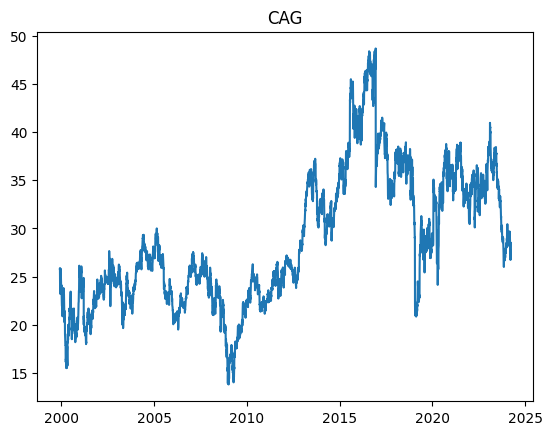

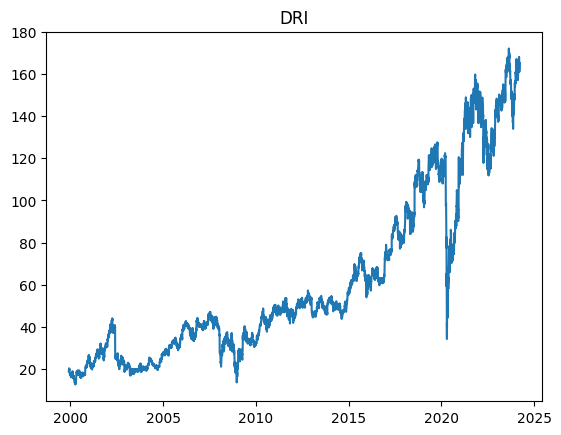

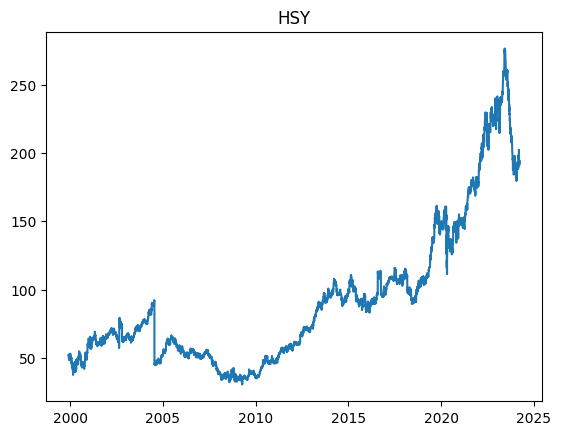

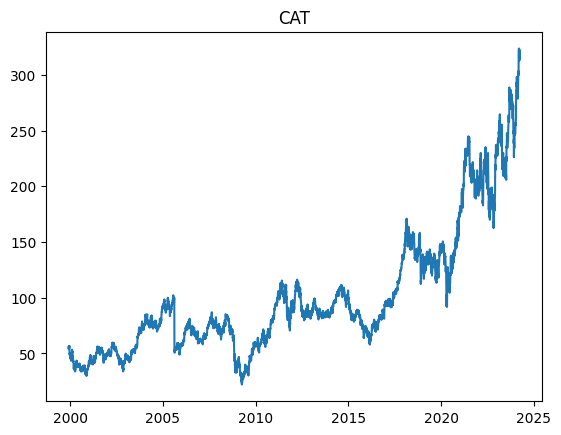

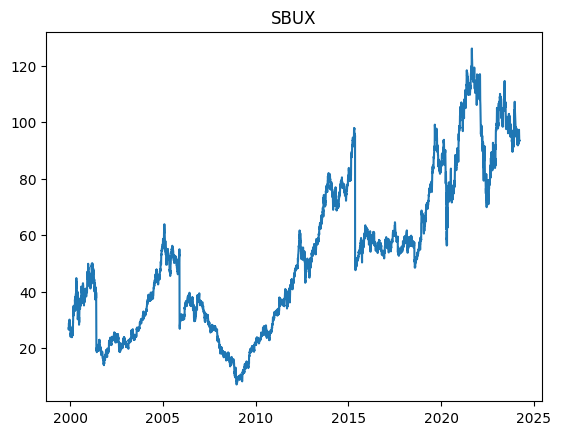

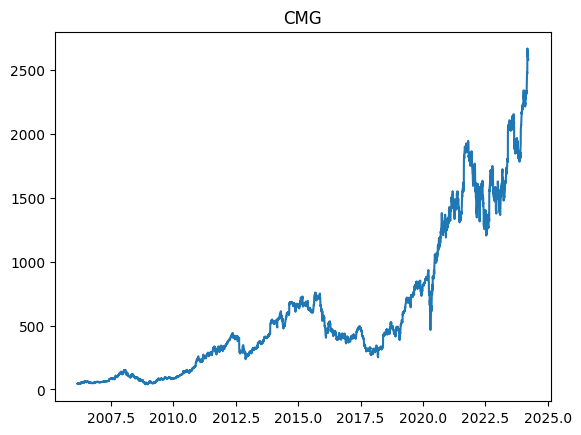

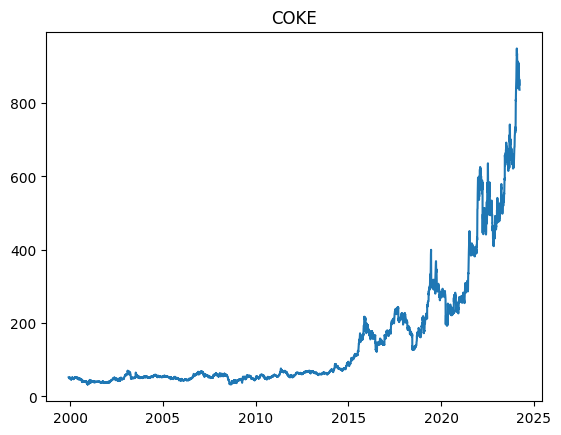

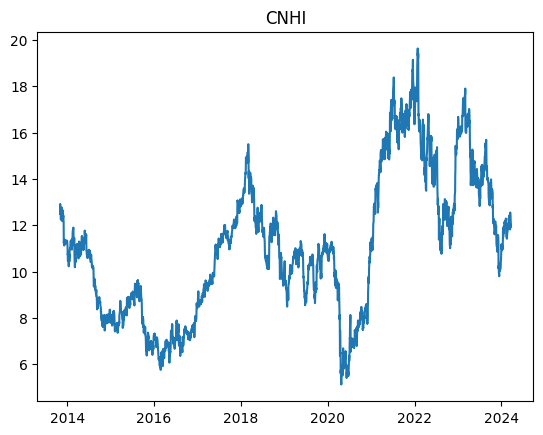

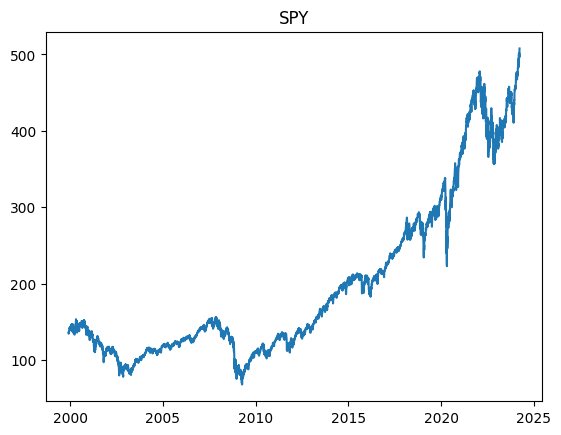

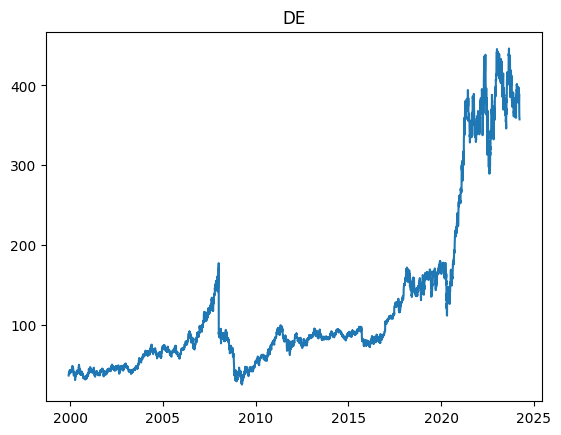

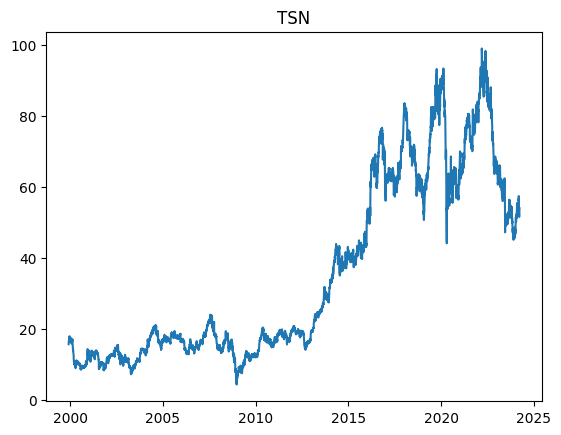

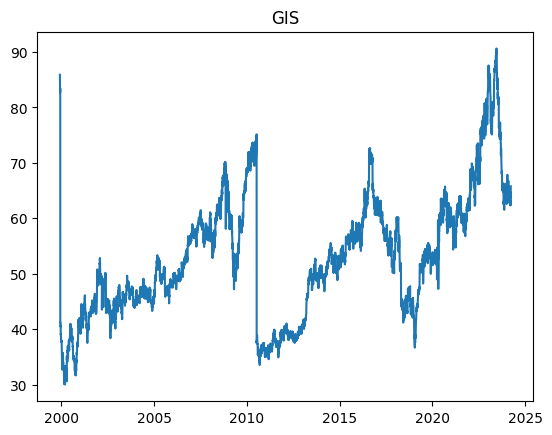

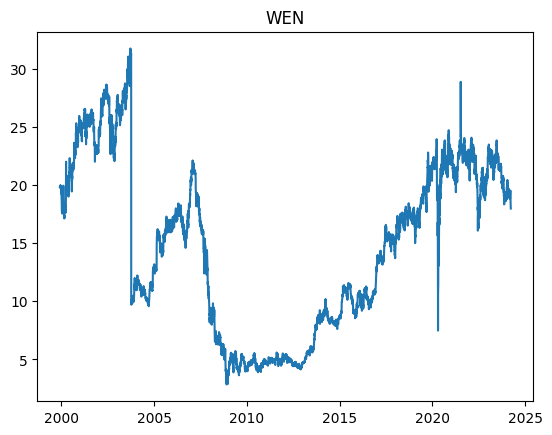

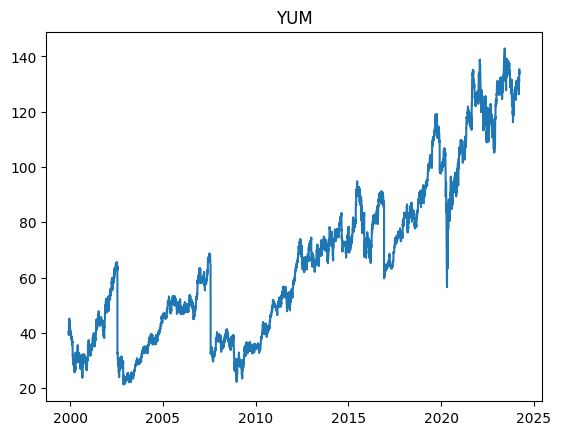

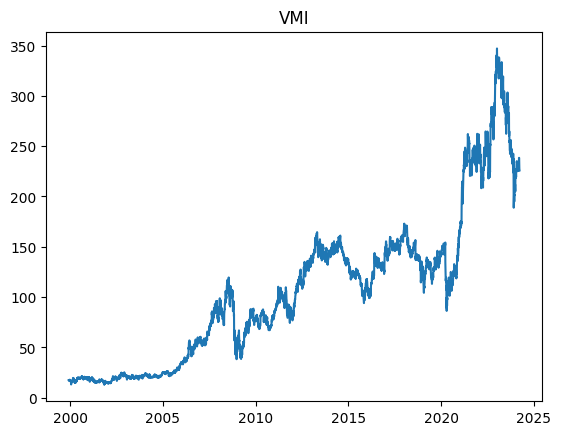

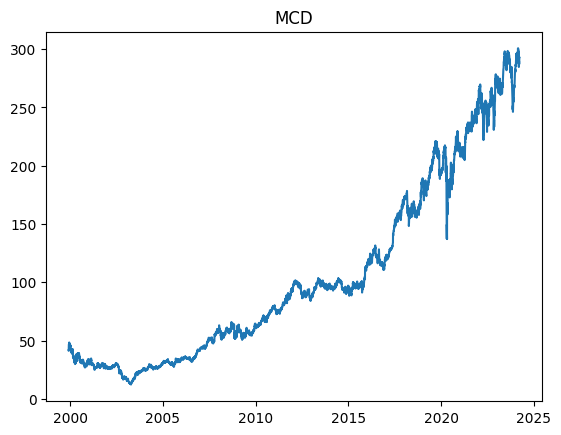

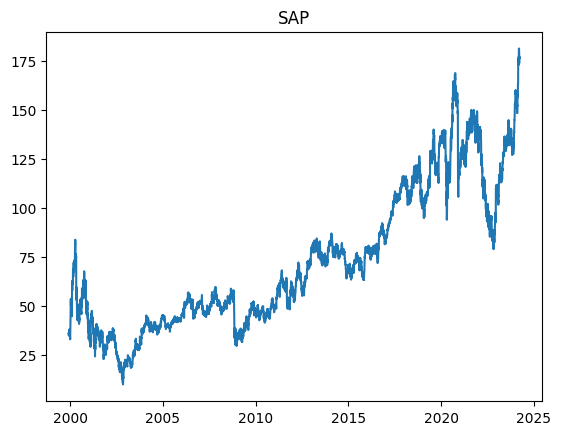

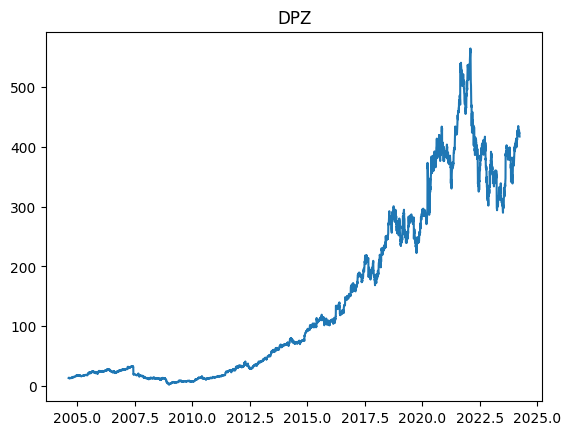

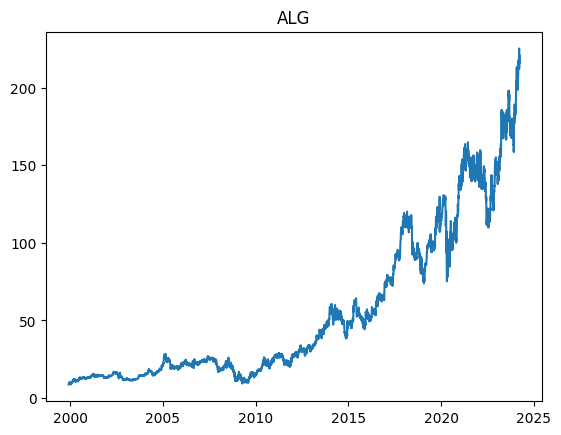

In [46]:
for ticker in tickers_dfs:
    plt.plot(tickers_dfs[ticker]["Time"].values, tickers_dfs[ticker]["Close"].values)
    plt.title(ticker)
    plt.show()